In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

justification:- 
initially as per the requirement of the cities we will filter the data accordingly.after filteration we get a required dataframe with use of panads then count the number of times funding is done by using value_counts function.
take indexes and values in sepearte arrays so that its easier to plot the garph.

Bangalore    635
Mumbai       449
New Delhi    389
Gurgaon      241
Noida         79
Name: CityLocation, dtype: int64


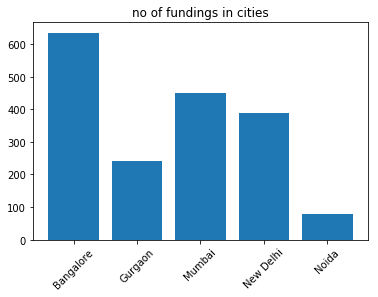

In [9]:
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start['CityLocation'].dropna(inplace=True)
def separateCity(city):   # fun which gives city name , may be from defined address
    return city.split('/')[0].strip()
df_start['CityLocation']=df_start['CityLocation'].apply(separateCity)
df_start['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df_start['CityLocation'].replace("bangalore","Bangalore",inplace=True)
df=df_start.loc[(df_start['CityLocation']=='Bangalore') | (df_start['CityLocation']=='New Delhi')| (df_start['CityLocation']=='Mumbai')
                     | (df_start['CityLocation']=='Noida') | (df_start['CityLocation']=='Gurgaon')]  #filteration of cities needed as per the question
select=df['CityLocation'].value_counts()   #no of times funding is done
print(select)
a=select.index
b=select.values
plt.bar(a,b)
plt.xticks(rotation = 45, horizontalalignment = 'center')
plt.title('no of fundings in cities')
plt.show()

Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

Justification:-
to find out top 5 investors we will amke dictionary with key having investor name and values will be the no of time investor has invested.
initially we will fill na value in place of blank space.investor name will be taken as first strip of the string. a loop is made to iterate over the data nad create the dictionary. later put the blank values and na values as 0.
sorting of the dictioanry according to the values to get max value and with decrease in same.we ahve created dictionary for getting unique investorname with according funding times. it is easy to keep a record.

In [3]:
df=pd.read_csv(r'startup_funding.csv')
df.InvestorsName.fillna('',inplace=True)

a=df.InvestorsName.str.split(',')
a.fillna('nin',inplace=True)
d={}       #dict created having key as investorname with value of no. of times invested n a startup
for i in a:
    for j in i:
        d[j.strip()]=d.get(j.strip(),0)+1
sr=pd.Series(d)   #converting into panda series
sr['nin']=0   #put 0 in place of nin
c=sr.sort_values(ascending=False,inplace=True)  #sorting the values in descending order so that we get investors with max value
for i in sr.index[:6]:
    print(i,sr[i])
    

Sequoia Capital 64
Accel Partners 53
 46
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Justification:-
as in above question we had created the dictionary we will use the same concept here but to avoid duplicacy that is investor investing in same company as many times should be counted as once, we use nested dictionary concept. if dictionary has key value in inner dictionary it will not increase its value for the same startup.iterations will be done as in code below.names of startups are corrected.at last, to visulaize it a bar graph is plotted between investors and no of times person has invested in different startups.

Sequoia Capital 48
Accel Partners 46
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


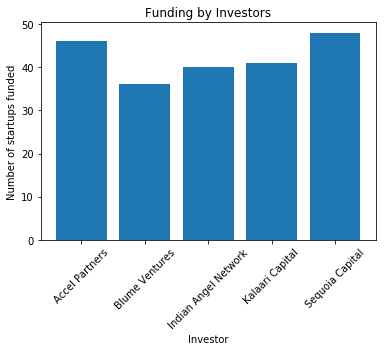

In [4]:
df = pd.read_csv('startup_funding.csv')

names = df['StartupName']
name_corrections = set()
for x in names:
    if 'ola' in x.lower() or 'flipkart' in x.lower() or 'oyo' in x.lower() or 'paytm' in x.lower():
        name_corrections.add(x)
        
name_corrections 


x = dict.fromkeys(['OYO Rooms', 'Oyo Rooms','OyoRooms','Oyorooms'], 'Oyo')
y = dict.fromkeys(['Ola Cabs','Olacabs'],'Ola')
df['StartupName']=df['StartupName'].replace(x)
df['StartupName']=df['StartupName'].replace(y)
df['StartupName']=df['StartupName'].replace({"Flipkart.com":"Flipkart"})
df['StartupName']=df['StartupName'].replace({'Paytm Marketplace':'Paytm'})
df['InvestorsName'].fillna('0',inplace = True) #nan handling of unknown investors

d = {}
# d is a dictionary which uses investors as keys for which value is another dictionary with
# startup names as keys and number of investments made in that startup as value
# for ex 'Sequoia Capital': {'Ola':5, 'Flipkart':2} could be a key value pair in d (so Sequoia would have invested
# 5 times in Ola and twice in Flipkart)

for _,row in df.iterrows():
    x = row['InvestorsName'].strip().rstrip(',') # trailing comma caused ' ' to appear as investor name so it had to be removed
    startup = row['StartupName'].strip()
    names = x.split(',')
    for name in names:
        if 'undisclosed' in name.lower(): #ignoring undisclosed investors
            break
        else:
            name = name.strip()
            if name in d:
                if startup in d[name]:
                    d[name][startup]+=1
                else:
                    d[name][startup]=1
            else:
                d[name]={}
                d[name][startup]=1


d2 = {}
#counts number of startups an investor has invested in, as is required by question
# ex: 'Sequoia Capital': 2 could be a key value pair in d2 corresponding to example key-value pair in d 
# i.e. Sequoia Capital invested in 2 startups (ola and flipkart)


for investor in d:
    d2[investor] = len(d[investor])
    
d2 = sorted(d2.items(), key=lambda x: x[1], reverse=True)[:5] # d2 is now a list of tuples (investor, count) 
# sorted in descending order of count

investors = [t[0] for t in d2]
counts = [t[1] for t in d2]
for i in range(len(d2)):
    print(investors[i],counts[i])
    
plt.bar(investors,counts)    #bar graph 
plt.xticks(rotation = 45, horizontalalignment = 'center')
plt.title('Funding by Investors')
plt.xlabel('Investor')
plt.ylabel('Number of startups funded')
plt.show()


Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Justification:-
now as per above justifiaction and the code, similar concept will be done here.
the only difference makes in the dataset where the filtaeration is done according to the investment type. here the filter is to be seed funding and crowd funding. the names of the startups and investment type has been corrected.
at alst, visualization is done with help of bar garph.

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


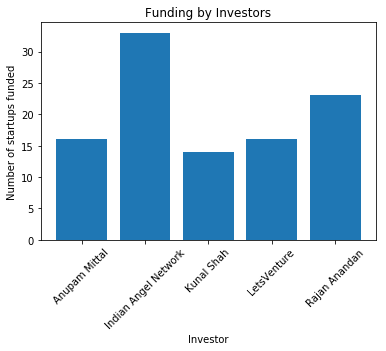

In [5]:
df=pd.read_csv("startup_funding.csv", encoding='utf-8')

df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)

df['InvestmentType'].replace("PrivateEquity","Private Equity",inplace=True)
df['InvestmentType'].replace("SeedFunding","Seed Funding",inplace=True)
df['InvestmentType'].replace("Crowd funding","Crowd Funding",inplace=True)
df=df.loc[(df['InvestmentType']=='Seed Funding') | (df['InvestmentType']=='Crowd Funding')]   #filtered data with investment type of seed funding and crowd funding

names = df['StartupName']
name_corrections = set()
for x in names:
    if 'ola' in x.lower() or 'flipkart' in x.lower() or 'oyo' in x.lower() or 'paytm' in x.lower():
        name_corrections.add(x)
        
name_corrections

x = dict.fromkeys(['OYO Rooms', 'Oyo Rooms','OyoRooms','Oyorooms'], 'Oyo')
y = dict.fromkeys(['Ola Cabs','Olacabs'],'Ola')
df['StartupName']=df['StartupName'].replace(x)
df['StartupName']=df['StartupName'].replace(y)
df['StartupName']=df['StartupName'].replace({"Flipkart.com":"Flipkart"})
df['StartupName']=df['StartupName'].replace({'Paytm Marketplace':'Paytm'})
df['InvestorsName'].fillna('0',inplace = True) #nan handling of unknown investors

d = {}
# d is a dictionary which uses investors as keys for which value is another dictionary with
# startup names as keys and number of investments made in that startup as value
# for ex 'Sequoia Capital': {'Ola':5, 'Flipkart':2} could be a key value pair in d (so Sequoia would have invested
# 5 times in Ola and twice in Flipkart)

for _,row in df.iterrows():
    x = row['InvestorsName'].strip().rstrip(',') # trailing comma caused ' ' to appear as investor name so it had to be removed
    startup = row['StartupName'].strip()
    names = x.split(',')
    for name in names:
        if 'undisclosed' in name.lower(): #ignoring undisclosed investors
            break
        else:
            name = name.strip()
            if name in d:
                if startup in d[name]:
                    d[name][startup]+=1
                else:
                    d[name][startup]=1
            else:
                d[name]={}
                d[name][startup]=1


d2 = {}
#counts number of startups an investor has invested in, as is required by question
# ex: 'Sequoia Capital': 2 could be a key value pair in d2 corresponding to example key-value pair in d 
# i.e. Sequoia Capital invested in 2 startups (ola and flipkart)


for investor in d:
    d2[investor] = len(d[investor])
    
d2 = sorted(d2.items(), key=lambda x: x[1], reverse=True)[:5] # d2 is now a list of tuples (investor, count) 
# sorted in descending order of count

investors = [t[0] for t in d2]
counts = [t[1] for t in d2]
for i in range(len(d2)):
    print(investors[i],counts[i])
    
plt.bar(investors,counts)   #bar graph 
plt.xticks(rotation = 45, horizontalalignment = 'center')
plt.title('Funding by Investors')
plt.xlabel('Investor')
plt.ylabel('Number of startups funded')
plt.show()


Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Justification:-
now when it is found that the seed funding should be private funding for more benfits the filteration of data is done accordingly ,editing the previous one. similarly as above the names of investment type and startups is corrected.now top investors are found in private equity as above by making nested dictionary.

Sequoia Capital 45
Accel Partners 42
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


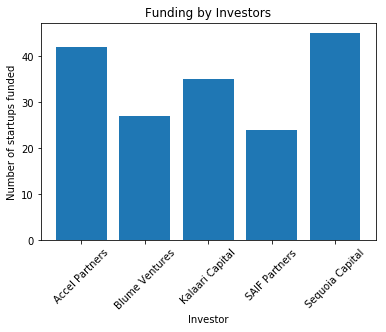

In [6]:
df=pd.read_csv("startup_funding.csv", encoding='utf-8')

df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)

df['InvestmentType'].replace("PrivateEquity","Private Equity",inplace=True)
df['InvestmentType'].replace("SeedFunding","Seed Funding",inplace=True)
df['InvestmentType'].replace("Crowd funding","Crowd Funding",inplace=True)
df=df.loc[(df['InvestmentType']=='Private Equity') ]   #having dataset with private equity filter

names = df['StartupName']
name_corrections = set()   #set is used so that no duplicacy is present
for x in names:
    if 'ola' in x.lower() or 'flipkart' in x.lower() or 'oyo' in x.lower() or 'paytm' in x.lower():
        name_corrections.add(x)
        
name_corrections 

# Making necessary corrections in startup names
x = dict.fromkeys(['OYO Rooms', 'Oyo Rooms','OyoRooms','Oyorooms'], 'Oyo')
y = dict.fromkeys(['Ola Cabs','Olacabs'],'Ola')
df['StartupName']=df['StartupName'].replace(x)
df['StartupName']=df['StartupName'].replace(y)
df['StartupName']=df['StartupName'].replace({"Flipkart.com":"Flipkart"})
df['StartupName']=df['StartupName'].replace({'Paytm Marketplace':'Paytm'})
df['InvestorsName'].fillna('0',inplace = True)   #handling nan values

d = {}
# d is a dictionary which uses investors as keys for which value is another dictionary with
# startup names as keys and number of investments made in that startup as value
# for ex 'Sequoia Capital': {'Ola':5, 'Flipkart':2} could be a key value pair in d (so Sequoia would have invested
# 5 times in Ola and twice in Flipkart)


for _,row in df.iterrows():
    x = row['InvestorsName'].strip().rstrip(',') 
    startup = row['StartupName'].strip()
    names = x.split(',')
    for name in names:
        if 'undisclosed' in name.lower():      #ignoring undisclosed investors
            break
        else:
            name = name.strip()
            if name in d:
                if startup in d[name]:
                    d[name][startup]+=1
                else:
                    d[name][startup]=1
            else:
                d[name]={}
                d[name][startup]=1


d2 = {}
#counts number of startups an investor has invested in, as is required by question
# ex: 'Sequoia Capital': 2 could be a key value pair in d2 corresponding to example key-value pair in d 
# i.e. Sequoia Capital invested in 2 startups (ola and flipkart)


for investor in d:
    d2[investor] = len(d[investor])
    
d2 = sorted(d2.items(), key=lambda x: x[1], reverse=True)[:5] 
# sorted in descending order of count

investors = [t[0] for t in d2]
counts = [t[1] for t in d2]
for i in range(len(d2)):
    print(investors[i],counts[i])
    
plt.bar(investors,counts)    #creating a bar graph
plt.xticks(rotation = 45, horizontalalignment = 'center')
plt.title('Funding by Investors')
plt.xlabel('Investor')   #label for x axis
plt.ylabel('Number of startups funded')   #label for y axis
plt.show()
